# PCA
## Dimensionality Reduction



In [21]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# load the dataset

In [27]:
df_pima=pd.read_csv('C:/Users/KSK/Downloads/unsupervised learning day1,day2 inclass,take home/Inclass/pima-indians-diabetes.csv')

In [28]:
df_pima.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


## Step 1: Normalize the data

In [12]:
from sklearn.decomposition import PCA

In [29]:
X_std = StandardScaler().fit_transform(df_pima)

## Step 2: Calculate the covariance matrix

In [30]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00130548  0.12901392  0.14138122 -0.08260275 -0.07309413  0.01754089
  -0.03397176  0.54472834  0.22137515]
 [ 0.12901392  1.00130548  0.15269695  0.05645473  0.33281735  0.22124355
   0.13708168  0.26275075  0.46646411]
 [ 0.14138122  0.15269695  1.00130548  0.20757846  0.08921407  0.2821451
   0.0412338   0.23988377  0.06496648]
 [-0.08260275  0.05645473  0.20757846  1.00130548  0.43854604  0.3930657
   0.18373769 -0.11602413  0.07336062]
 [-0.07309413  0.33281735  0.08921407  0.43854604  1.00130548  0.19836937
   0.18582106 -0.0409953   0.13215606]
 [ 0.01754089  0.22124355  0.2821451   0.3930657   0.19836937  1.00130548
   0.14072974  0.03595806  0.29307759]
 [-0.03397176  0.13708168  0.0412338   0.18373769  0.18582106  0.14072974
   1.00130548  0.03278114  0.17347152]
 [ 0.54472834  0.26275075  0.23988377 -0.11602413 -0.0409953   0.03595806
   0.03278114  1.00130548  0.2367261 ]
 [ 0.22137515  0.46646411  0.06496648  0.07336062  0.13215606  0.29307759
  

## Understand the data using pair plot

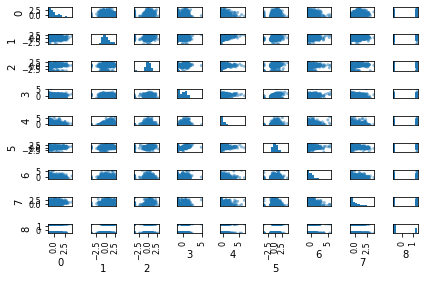

In [31]:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

## Step 3: Calculate the eigenvalues and eigenvectors

In [32]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [33]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.21456238  0.52803394  0.16484408  0.25172732 -0.54565381  0.08433322
  -0.45758049 -0.1627533   0.2094856 ]
 [ 0.43660034  0.09685505 -0.39177735  0.58065547  0.00694725 -0.21051455
   0.38338794  0.32478981  0.11184632]
 [ 0.30053514  0.04761134  0.62902294 -0.07193729 -0.15843549  0.3291468
   0.60759627 -0.00993469 -0.06209358]
 [ 0.30768908 -0.44843129  0.29542287  0.40736069  0.42745145  0.27576776
  -0.39615014 -0.07406955  0.17272978]
 [ 0.33857052 -0.35319394 -0.14132754 -0.48640988 -0.25792465 -0.07759205
  -0.00832584  0.09033096  0.65060076]
 [ 0.39794675 -0.2088748   0.25148421 -0.13239695 -0.16790017 -0.57058566
  -0.24217548  0.1681267  -0.52589204]
 [ 0.23765802 -0.17483205 -0.28399501  0.04745593 -0.09415923 -0.05568138
   0.1702117  -0.87278163 -0.16541168]
 [ 0.27682752  0.53421216  0.12693634 -0.2727393   0.61937359 -0.3043826
   0.0018107  -0.17327492  0.20293949]
 [ 0.4150214   0.15530061 -0.3954853  -0.31239809  0.08480514  0.58038638
  -0.1

In [34]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [35]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 26.12117576  45.84298231  58.29832717  68.10118971  77.49012867
  85.65680086  91.08737824  95.72219859 100.        ]


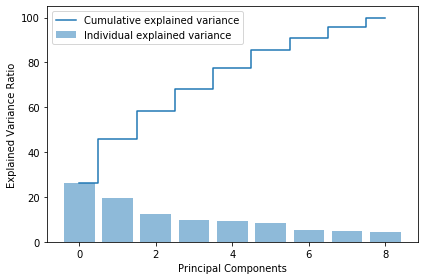

In [38]:
plt.figure(figsize=(6 , 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

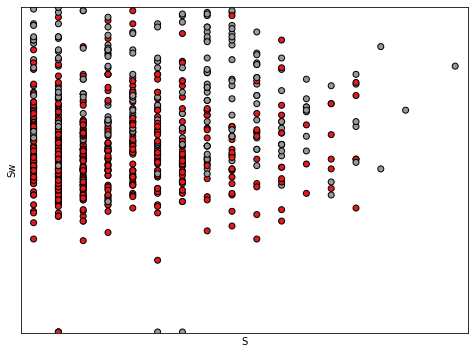

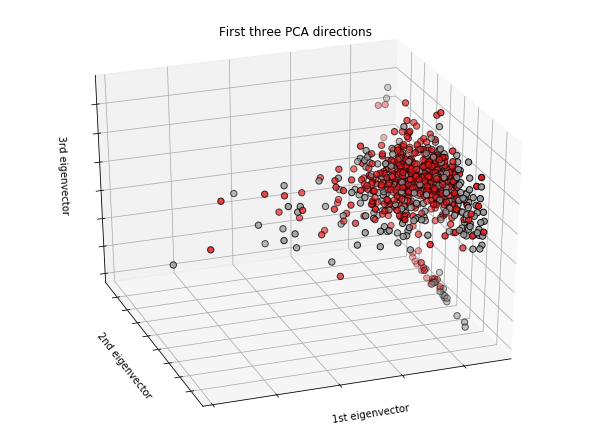

In [72]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with

X=df_pima[['6','148']]  # we only take the first two features.
y = df_pima['1']

## Get the min and max of the two dimensions and extend the margins by .5 on both sides to get the data points away
## from the origin in the plot
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5

## plot frame size
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points (scatter plot, all rows first and second column only)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('S')
plt.ylabel('Sw')


## plotting the axes with ticks
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_pima)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()


In [47]:
X=df_pima[['6','148']]

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### DT Classifier Before Applying PCA

In [50]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
y_pred_DT = model.predict(X_test)

In [52]:
cm_DT= confusion_matrix(y_test, y_pred_DT)
cm_DT

array([[79, 22],
       [27, 26]], dtype=int64)

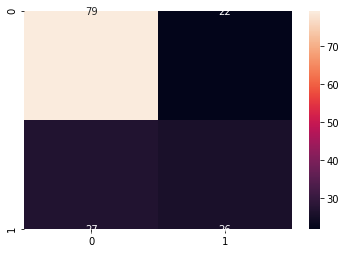

In [53]:
sns.heatmap(cm_DT, annot=True)
plt.show()

In [54]:
classification=classification_report(y_test,y_pred_DT)
print(classification)

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       101
           1       0.54      0.49      0.51        53

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.68      0.68      0.68       154



In [55]:
ac = accuracy_score(y_test, y_pred_DT)
print("Accuracy Score:", ac)

Accuracy Score: 0.6818181818181818


### DT After Applying PCA

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [59]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.55776675, 0.44223325])

In [60]:
from sklearn import tree
model2=tree.DecisionTreeClassifier()
model2.fit(X_train_2,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [61]:
y_pred_DT_2 = model2.predict(X_test_2)

In [62]:
from sklearn.metrics import confusion_matrix
cm_PCA= confusion_matrix(y_test, y_pred_DT_2)

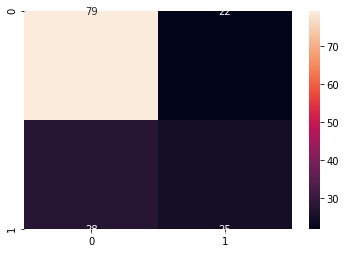

In [63]:
sns.heatmap(cm_PCA, annot=True)
plt.show()

In [64]:
ac_PCA = accuracy_score(y_test, y_pred_DT_2)
print("Accuracy Score:", ac_PCA)

Accuracy Score: 0.6753246753246753


In [65]:
classification_2=classification_report(y_test,y_pred_DT_2)
print(classification_2)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       101
           1       0.53      0.47      0.50        53

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154

